Name: Nguyen Quoc Dinh

Student ID: 300550781


## Assignment 2- Queues

#### Problem 1
- Single server with infinite capacity
- mean service rate follows a Markovian process: $\mu$ > 0
- customer mean arrival rate: $\lambda$ > 0
- If one person in the system, customer mean arrival rate $\frac{\lambda}{2}$
- If n people in the system, customer mean arrival rate $\frac{\lambda}{2^n}$

**a. Describe the system graphically**

              λ       λ/2       λ/4        λ/8       ...       λ/2^𝑛
          |-------->|-------->|--------->|--------->      |--------->|  
          1         2         3          4               n-1         n
          | µ       |   µ     |    µ     |    µ    ...    |    µ     |
          |<--------|<--------|<---------|<--------       |<----------


M/M/1
- the system has a Poisson arrival process with an exponential service time distribution and one server

- λ: customer mean arrival rate
- µ: serving rate

**b.  Compute the steady-state distribution π = ($π_0, π_1, π_2$, . . .)**

To find the steady-state distribution of the system, we need to solve the balance equations:

$\lambda\pi_0 = \mu\pi_1$

$(\lambda/2)\pi_1 = \mu\pi_2 + (\lambda/2)\pi_0$

$(\lambda/4)\pi_2 = \mu\pi_3 + (\lambda/2)\pi_1$

...

$(\lambda/2^n)\pi_{n-1} = \mu\pi_n + (\lambda/2^{n-1})\pi_{n-1}$

Using the first equation to solve for $\pi_1$: $\pi_1 = (\lambda/\mu)\pi_0$

Substituting it into the second equation, we have: $(\lambda/2)(\lambda/\mu)\pi_0 = \mu\pi_2 + (\lambda/2)\pi_0$

Solving for $\pi_2 = ((\lambda/2)^2 / \mu)\pi_0$

We can use mathematical induction to show that the steady-state distribution: $\pi_n = ((\lambda/2)^n / \mu^n)\pi_0$

To find the value of $\pi_0$, we can use the fact that the sum of all probabilities in the system must equal 1:

$\sum_n \pi_n = 1$

Substituting the expression for $\pi_n$, we get:

$\sum_n ((\lambda/2)^n / \mu^n)\pi_0 = 1 <=> \pi_0 \sum_n ((\lambda/2)^n / \mu^n) = 1 <=> \pi_0 = 1 / \sum_n ((\lambda/2)^n / \mu^n)$

Therefore, the steady-state distribution is:

$\pi_n = ((\lambda/2)^n / \mu^n) \frac{1}{\sum_n ((\lambda/2)^n / \mu^n)}$

**c. What is the expected queue length?**

To find the expected queue length:
- Step 1: find the mean number of customers in the system, L:

Using Little's Law to find L: $L = \lambda*W$ 

- Step 2: find the mean time a customer spends in the system, W:

Using the fact that the system is in the steady state, the time a customer spends is exponentially distributed. Along with the time interval between arrivals is exponentially distributed,we have:

$W = \frac{1}{\mu - \lambda}$

Substituting this into Little's Law, we get: $L = \lambda \frac{1}{\mu - \lambda}$

Therefore, the expected queue length is:

$L-1 = \frac{\lambda}{\mu - \lambda} - 1 = \frac{-\mu}{\mu - \lambda}$

Note: L-1 because a singler server should not be included.

**d. Find a relationship between λ and μ that grants system stability**

|                     | System condition | Queue state        | Average number of customers in the queue |
|---------------------|------------------|--------------------|------------------------------------------|
| $\frac{λ}{2^n} < μ$ | stable           | steady             | finite                                   |
| $\frac{λ}{2^n} = μ$ | critical         | indefinitely       | infinite                                 |
| $\frac{λ}{2^n} > μ$ | unstable         | grow without bound | infinite                                 |

Therefore, a relationship that grants system stability is: λ ≤ μ

**e. Obtain and analyze the expected number of customers in the system. Use the ratio η = μ/λ as your parameter. Interpret.**

Answer:

The utilization factor, η: a measure of the degree to which a system's resoucres are being used. When it's high, it leads to longer wait times and potentially reduced system performance.

Using Little's Law: L = λW

- L: the expected number of customers in a stable system
- W: the average time a customer spends in the system
- λ: the mean arrival rate

With $W = \frac{1}{μ - λ}$ and $η = \frac{μ}{λ}$, we have: $W = \frac{1}{λ(η-1)}$ and finally: 

$L = \frac{λ}{λ(η-1)} = \frac{1}{η-1}$

Interpretation: 

The expected number of customers in the system is proportional to the utlization factor η. It approaches infinity as η approaches 1 (the mean service rate as nearly high as the mean arrival rate). Consequently, the system excesses congestion and customer wait time becomes infinity. The system performance would be improved if and only if we can lower the utilization factor such as priority queues or multiple servers.

#### Problem 2

Customers arrive, following a Markovian process with rate λ > 0, at a store with two counters and no waiting room. The counters serve the customers according to a Markovian process with rate μ > 0. Model the system as a birth-and-death process. 

Question: When is this system stable? Compute its steady-state distribution, and plot the probability function π that characterizes it as a function of the ratio λ/μ. Show your code. Interpret

Answer: 

The M/M/2 queueing system is stable when the traffic intensity is less than 1.

$$
\rho = \frac{\lambda}{2*\mu} < 1
$$

To compute its steady-state distribution and to plot the probability function $\pi$ as a function of the ratio $\lambda/2\mu$, we can use the following code in Python:

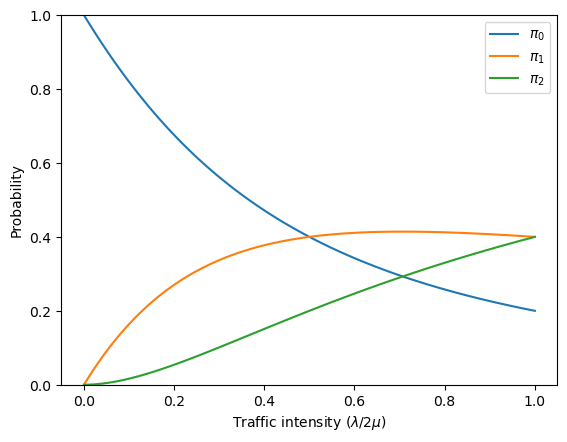

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# number of servers
s = 2
# mean service rate
mu = 1  
# mean arrival rates - simulation in a range from 0 to s*mu
# match the steady-state condition: lambda/s*mu < 1 or lambda < s*mu
lam_vals = np.linspace(0, s*mu, num=100)  

# a 3x100 matrix => simulate 100 records of (p0, p1, p2)
pi = np.zeros((3, len(lam_vals)))  # steady-state probabilities

# Compute steady-state probabilities for 100 different mean arrival rates
for i, lam in enumerate(lam_vals):
    val1 = lam/mu
    val2 = lam**2/s*(mu**2)
    val = 1 + val1 + val2
    p0 = 1/val
    p1 = (lam/mu) * p0
    p2 = (lam**2/s*(mu**2)) * p0
    pi[:, i] = [p0, p1, p2]

# Plot probability function
traffic_intensity = lam_vals/2*mu

fig, ax = plt.subplots()
ax.plot(traffic_intensity, pi[0, :], label=r'$\pi_0$')
ax.plot(traffic_intensity, pi[1, :], label=r'$\pi_1$')
ax.plot(traffic_intensity, pi[2, :], label=r'$\pi_2$')
ax.set_xlabel(r'Traffic intensity ($\lambda/2\mu$)')
ax.set_ylabel('Probability')
ax.set_ylim([0, 1])
ax.legend()
plt.show()

**Interpretation:**

The probability function π shows how the system's steady-state distribution changes as the mean arrival rate λ varies relative to the mean service rate μ. 

As the mean arrival rate increases (in a range from 0 to 2μ), the probability of finding the system empty (p0 - customers in the shop) decreases, while the probability of finding one or two customers in the system (p1 and p2) increases.

The probability function has a peak at a certain traffic intensity value (λ/2μ = 1), which corresponds to the optimal operating point of the system. Beyond this point, the system becomes congested, and the performance deteriorates.